In [1]:
# this notebook successfully continues training the convolutional autoencoder!

import tensorflow as tf
from ConvoAutoencoder import ConvoAutoencoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from data_utils import read_images
from data_utils_local08 import *
from conv_vae import *
import cv2

/Users/chloeloughridge/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:

# start interactive tensorflow session
sess = tf.InteractiveSession()

In [63]:
# run this cell after training the autoencoder
# gonna try saving this
saver = tf.train.Saver()

In [39]:
# rejuvenate the trained variables
reawakened = tf.train.import_meta_graph('my_ckpts/trained_auto02.meta')
reawakened.restore(sess, tf.train.latest_checkpoint('my_ckpts/'))

INFO:tensorflow:Restoring parameters from my_ckpts/trained_auto02


In [40]:
X_input = np.load('./train_data_Auto01.npy')

In [41]:
print(X_input.shape)
# reshape the X_input matrix
X_input = np.reshape(X_input, [-1,X_input.shape[1],64,64,3])
print(X_input.shape)

(7, 6298, 4096, 3)
(7, 6298, 64, 64, 3)


In [42]:
# normalize the input data
X_input = X_input / 255.0

In [65]:
# reset the default graph
tf.reset_default_graph()

In [66]:
# restoring the model

# restoration
saver = tf.train.import_meta_graph('./my_ckpts/trained_auto02.meta')
path = tf.train.latest_checkpoint('./my_ckpts')
saver.restore(sess, path)

graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./my_ckpts/trained_auto02


In [67]:
# testing how the autoencoder performs before training

# send input data through again
test_image = sess.graph.get_tensor_by_name("Placeholder:0")
# restore the operation sigmoid --> you should test up until sigmoid_3
sigmoid = sess.graph.get_tensor_by_name("Sigmoid:0")

output_images = sess.run(sigmoid, feed_dict={test_image: X_input[6][543][np.newaxis, :, :, :]})
output_images = output_images * 255
output_images = output_images.astype(np.uint8)

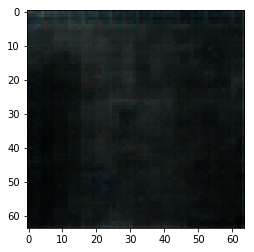

In [68]:
# print out the reconstructed image
plt.imshow(output_images[0])
plt.show()

In [69]:
# gonna try saving this
saver = tf.train.Saver()

In [38]:
# train the model! (On one movie)
#num_frames = X_input.shape[0]
#batch_num = 25
#num_epochs = 3

train_restored(sess, 5, X_input[5].shape[0], 50, 10)

0
1


KeyboardInterrupt: 

In [70]:
# train the model on multiple (all of) the movies:
for num in range(X_input.shape[0]):
    train_restored(sess, num, X_input[num].shape[0], 50, 2)

0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [20]:
# building a nicer training function for the restored autoencoder
def train_restored(sess, movie_num, num_frames, batch_num, num_epochs):
    input_images = sess.graph.get_tensor_by_name("Placeholder:0")
    # decide how many times we will send in batches of data per epoch
    num_feeds = int(num_frames / batch_num) # just leave off the smaller batch at the end
    #if num_feeds % 1 == 0:
        #num_feeds = int(num_feeds)
    #else:
        #num_feeds = int(num_feeds) + 1
        
    for epoch in range(num_epochs):
        count = 0
        for num in range(num_feeds):
            feed_dict = {input_images: X_input[movie_num, count:count+batch_num, :, :, :]}

            # ops to restore
            update_conv1_w = sess.graph.get_tensor_by_name("Adam/update_conv1/w/ApplyAdam:0")
            update_conv1_b = sess.graph.get_tensor_by_name("Adam/update_conv1/b/ApplyAdam:0") 
            update_conv2_w = sess.graph.get_tensor_by_name("Adam/update_conv2/w/ApplyAdam:0") 
            update_conv2_b = sess.graph.get_tensor_by_name("Adam/update_conv2/b/ApplyAdam:0") 
            update_z_fc_w = sess.graph.get_tensor_by_name("Adam/update_z_fc_dense/w/ApplyAdam:0")
            update_z_fc_b = sess.graph.get_tensor_by_name("Adam/update_z_fc_dense/b/ApplyAdam:0")
            update_z_std_dense_w = sess.graph.get_tensor_by_name("Adam/update_z_stddev_dense/w/ApplyAdam:0")
            update_z_std_dense_b = sess.graph.get_tensor_by_name("Adam/update_z_stddev_dense/b/ApplyAdam:0")
            update_z_mean_w = sess.graph.get_tensor_by_name("Adam/update_z_mean_dense/w/ApplyAdam:0")
            update_z_mean_b = sess.graph.get_tensor_by_name("Adam/update_z_mean_dense/b/ApplyAdam:0")
            update_deconv1_w = sess.graph.get_tensor_by_name("Adam/update_deconv1/w/ApplyAdam:0")
            update_deconv2_w = sess.graph.get_tensor_by_name("Adam/update_deconv2/w/ApplyAdam:0")


            #before = sess.run("conv1/w:0")

            sess.run([update_conv1_w, update_conv1_b, 
                     update_conv2_w,
                     update_conv2_b,
                     update_z_fc_w,
                     update_z_fc_b,
                     update_z_std_dense_w,
                     update_z_std_dense_b,
                     update_z_mean_w,
                     update_z_mean_b,
                     update_deconv1_w,
                     update_deconv2_w], feed_dict)
            
            count = count + batch_num
        print(epoch)

            #after = sess.run("conv1/w:0")
    

In [75]:
# visualize one of the input/output frames of the ConvoAutoencoder

# send input data through again
test_image = sess.graph.get_tensor_by_name("Placeholder:0")
# restore the operation sigmoid --> you should test up until sigmoid_3
sigmoid = sess.graph.get_tensor_by_name("Sigmoid:0")

output_images = sess.run(sigmoid, feed_dict={test_image: X_input[0][2840][np.newaxis, :, :, :]})
output_images = output_images * 255
output_images = output_images.astype(np.uint8)

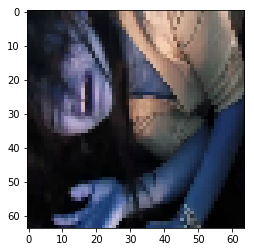

In [76]:
# view the test image 
test = X_input[0][2840]

plt.imshow(test)
plt.show()

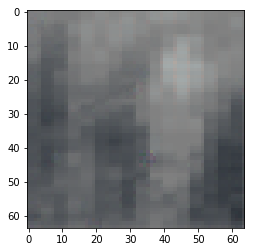

In [77]:
# view the constructed output
plt.imshow(output_images[0])
plt.show()

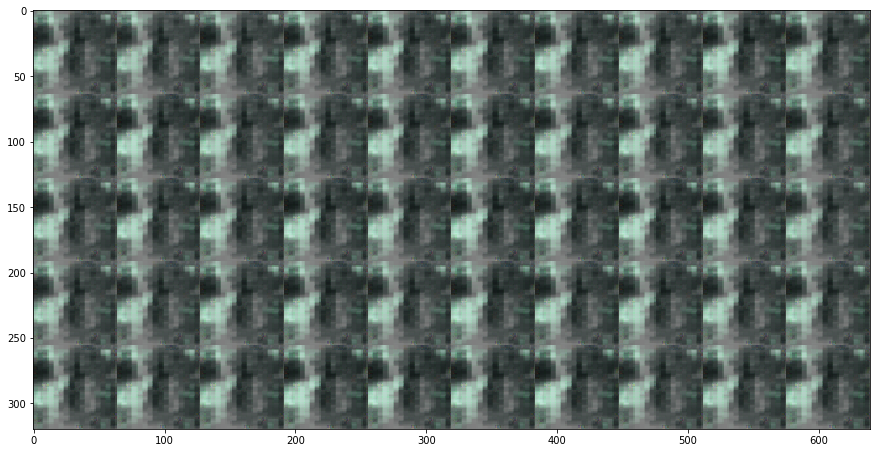

In [45]:
# print out the reconstructed image
w = 10
h = 5
figure = np.zeros([64 * h, 64 * w, 3], dtype = np.uint8)
k = 0
for i in range(h):
    for j in range(w):
        image = np.reshape(output_images[k], [64, 64, 3])
        figure[i * 64: (i + 1) * 64,
               j * 64: (j + 1) * 64,
               :] = image
        k += 1
    
plt.figure(figsize=(15, 15))
plt.imshow(figure)
plt.show()

In [74]:
# save the version of this model
saver.save(sess, './my_ckpts/trained_auto03')

TypeError: Cannot interpret feed_dict key as Tensor: The name 'save/Const_1:0' refers to a Tensor which does not exist. The operation, 'save/Const_1', does not exist in the graph.

In [ ]:
# save the trained autoencoder --> the trained weights of the autoencoder and the model architecture will be 
    #sent into another folder, probably the LSTM folder 

In [78]:
tf.all_variables()

Instructions for updating:
Please use tf.global_variables instead.


[<tf.Variable 'conv1/w:0' shape=(5, 5, 3, 16) dtype=float32_ref>,
 <tf.Variable 'conv1/b:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'conv2/w:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'conv2/b:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'z_mean_dense/w:0' shape=(8192, 10) dtype=float32_ref>,
 <tf.Variable 'z_mean_dense/b:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'z_stddev_dense/w:0' shape=(8192, 10) dtype=float32_ref>,
 <tf.Variable 'z_stddev_dense/b:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'z_fc_dense/w:0' shape=(10, 8192) dtype=float32_ref>,
 <tf.Variable 'z_fc_dense/b:0' shape=(8192,) dtype=float32_ref>,
 <tf.Variable 'deconv1/w:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'deconv1/b:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'deconv2/w:0' shape=(5, 5, 3, 16) dtype=float32_ref>,
 <tf.Variable 'deconv2/b:0' shape=(3,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0'